# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


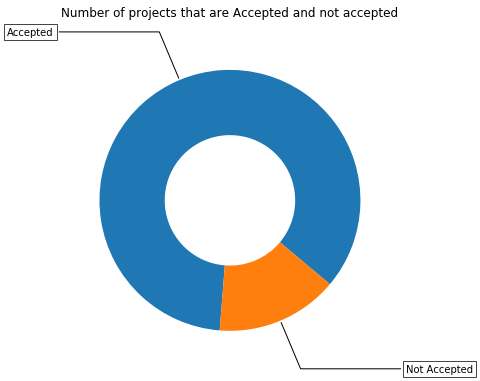

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of projects that are Accepted and not accepted\n")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

temp.head(3)

,state_code,num_proposals
0,AK,0.840580
1,AL,0.854711
2,AR,0.831268


In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


**Observation:** Projects from Delaware have the highest chances of getting approved which is 89.79%, whereas projects from Vermont have the acceptance rate of 80%.

In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    
    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

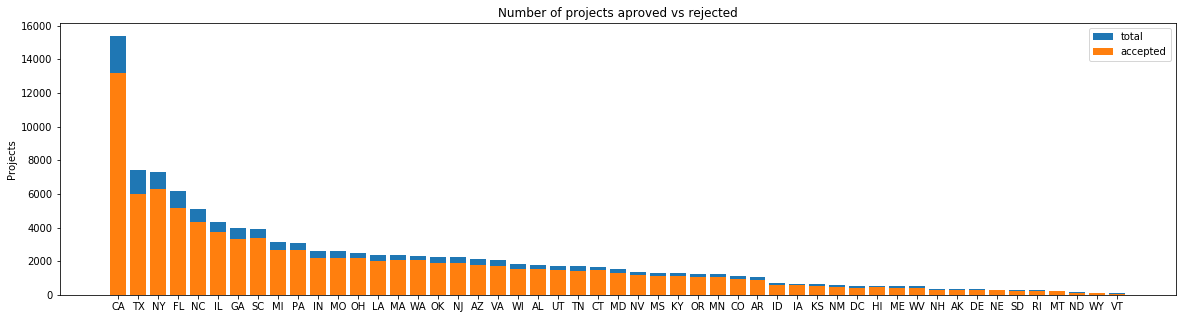

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

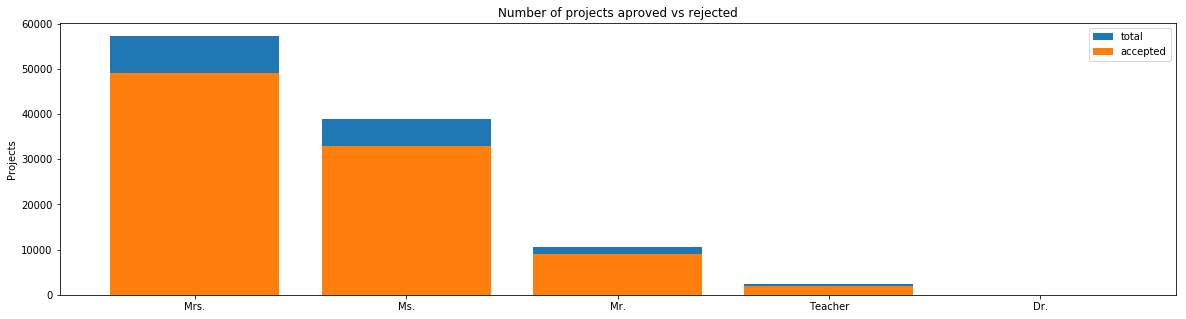

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

**Observation:** Teachers with prefixes Mrs. have the highest approval rates and Dr. having the least approval rates.

### 1.2.3 Univariate Analysis: project_grade_category

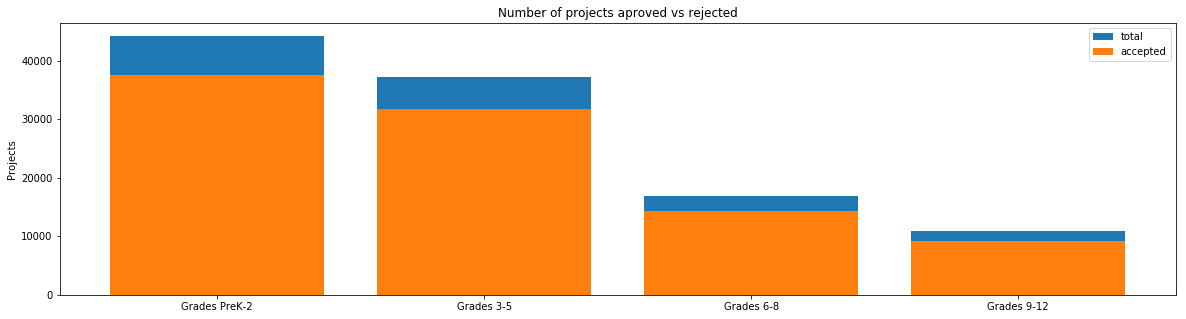

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**Observation:** There are lot of projects for grades PreK-2 and 3-5 and their acceptance rate is above 84%

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
categories = list(project_data['project_subject_categories'].values)

cat_list = []
for i in categories:
    temp=''
    for j in i.split(','):
        if 'The' in j.split():
            j = j.replace("The", '')
        j = j.replace(' ', '')
        j = j.replace('&', '_')
        temp += j.strip() + ' '
    cat_list.append(temp)

In [15]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


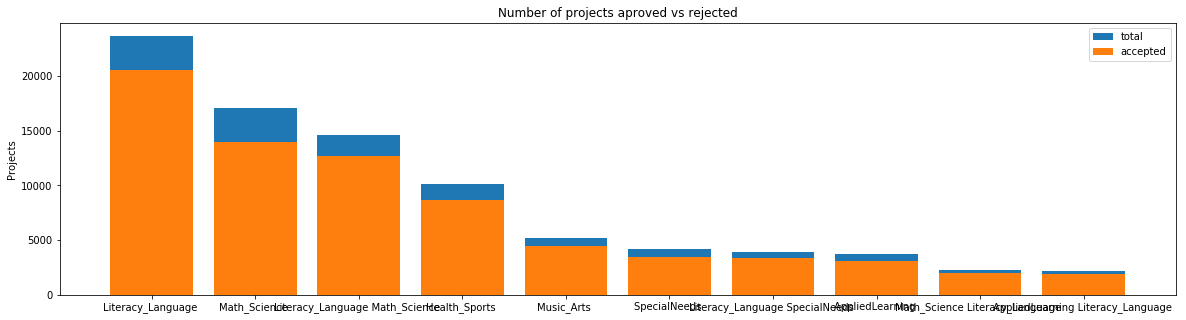

                   clean_categories  project_is_approved  total       Avg
24               Literacy_Language                 20520  23655  0.867470
32                    Math_Science                 13991  17072  0.819529
28  Literacy_Language Math_Science                 12725  14636  0.869432
8                    Health_Sports                  8640  10177  0.848973
40                      Music_Arts                  4429   5180  0.855019
                      clean_categories  project_is_approved  total       Avg
46                       SpecialNeeds                  3431   4226  0.811879
30     Literacy_Language SpecialNeeds                  3389   3961  0.855592
0                     AppliedLearning                  3072   3771  0.814638
36     Math_Science Literacy_Language                  1968   2289  0.859764
3   AppliedLearning Literacy_Language                  1887   2191  0.861251


In [16]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=10)

**Observation:**
1. Literacy_language & Math_science projects are submitted more than other project topics
2. Combined projects of Literacy_language & Math_science have acceptance rate of around 87%.

In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [18]:
my_counter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

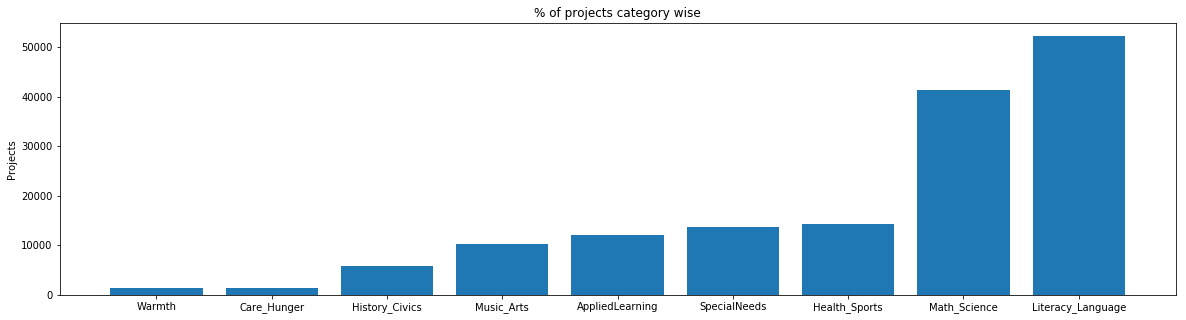

In [19]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

**Observation:** Warmth, Care_Hunger & History_Civics have the least number of submitted projects.

In [20]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [21]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [22]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


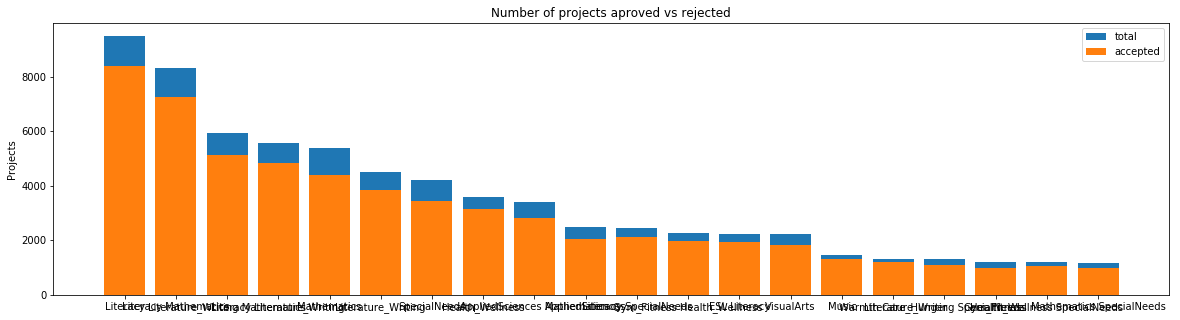

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                 clean_subcategories  project_is_approved  total       Avg
400               Warmth Care_Hunger                 1212   1309  0.925898
338  Literature_Writing SpecialNeeds                 1093   1306  0.836907
256                      Gym_Fitness                 1002   1195  0.838494
300     Health_Wellness SpecialNeeds                 1044   1189  0.878049
349         Mathematics SpecialNeeds                  972   1187  0.818871


In [180]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=20)

**Observation:** Projects with subcategories warmth, care_hunger have an average approval rate of 92.5%.

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

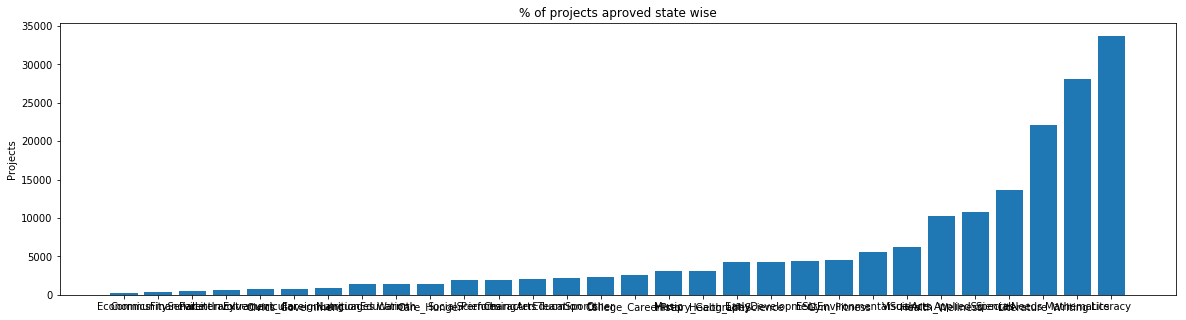

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [26]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

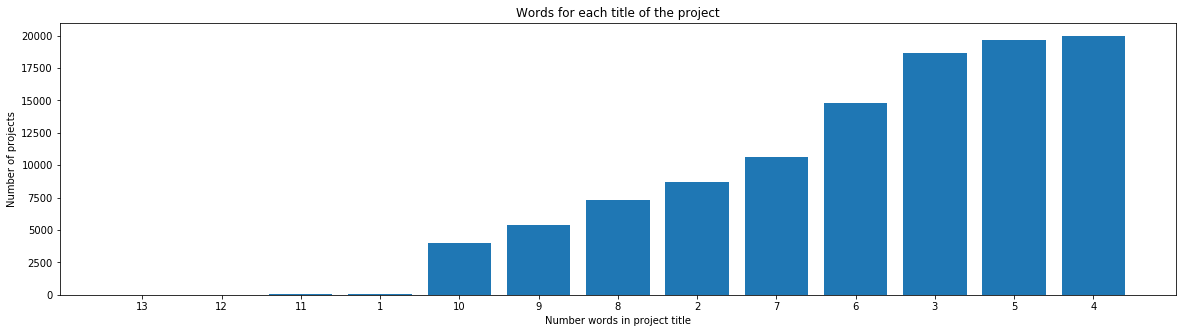

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**Observation:** 4 word title occurs the most in the dataset followed by 5 and 3.

In [28]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

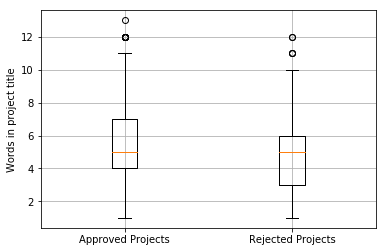

In [29]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

**Observation:** 
1. 50% of the approved projects have 4-7 words in their project titles, average being at 5.
2. 50% of the rejected projects have 3-6 words in their project titles, average being at 5.

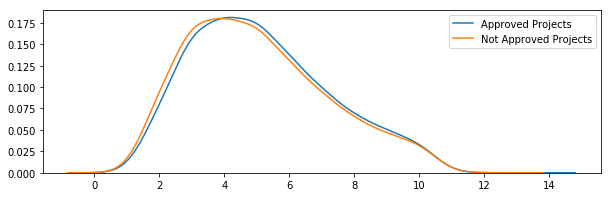

In [30]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observation:** The number of approved projects is slightly higher than the number of rejected projects with respect to project title, i.e., projects with higher word count in title have a higher chance of getting approved.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [31]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) + \
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [32]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

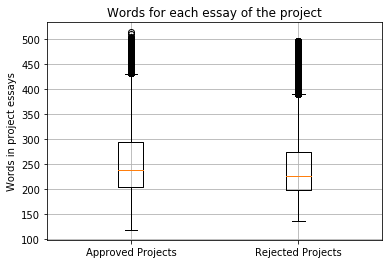

In [33]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

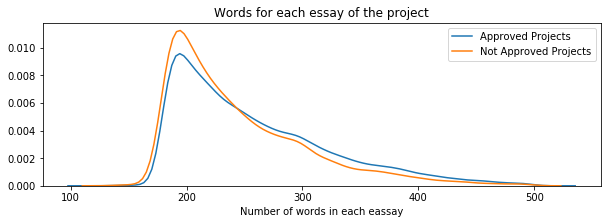

In [34]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

**Observation:** From both the box-plot and pdf, approved projects have longer essays than rejected projects.

### 1.2.8 Univariate Analysis: Cost per project

In [35]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [36]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [37]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [38]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

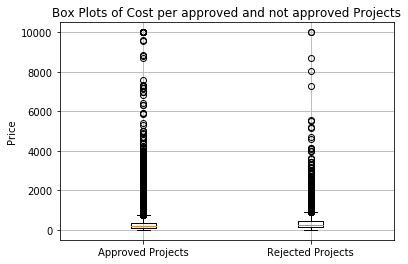

In [39]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

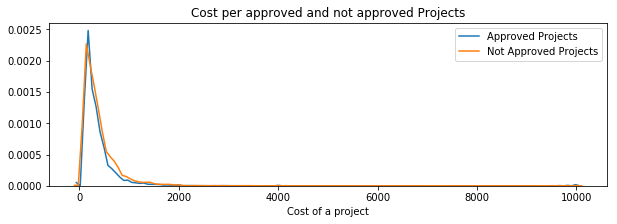

In [40]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

**Observation:** Cost of projects which were rejected were slightly higher than those which were accepted.

In [41]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [42]:
approved_teacher_prev_posted_proj = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_teacher_prev_posted_proj = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

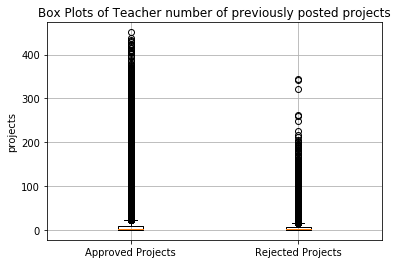

In [43]:
plt.boxplot([approved_teacher_prev_posted_proj, rejected_teacher_prev_posted_proj])
plt.title('Box Plots of Teacher number of previously posted projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('projects')
plt.grid()
plt.show()

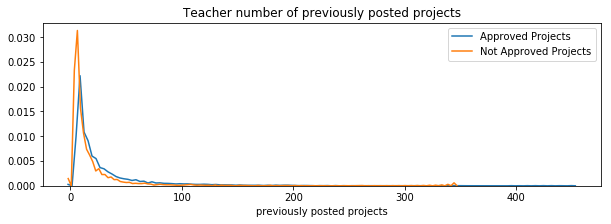

In [44]:
plt.figure(figsize=(10,3))
sns.distplot(approved_teacher_prev_posted_proj, hist=False, label="Approved Projects")
sns.distplot(rejected_teacher_prev_posted_proj, hist=False, label="Not Approved Projects")
plt.title('Teacher number of previously posted projects')
plt.xlabel('previously posted projects')
plt.legend()
plt.show()

**Observation:** The teachers who previously posted higher number of projects have higher chance of getting approval.

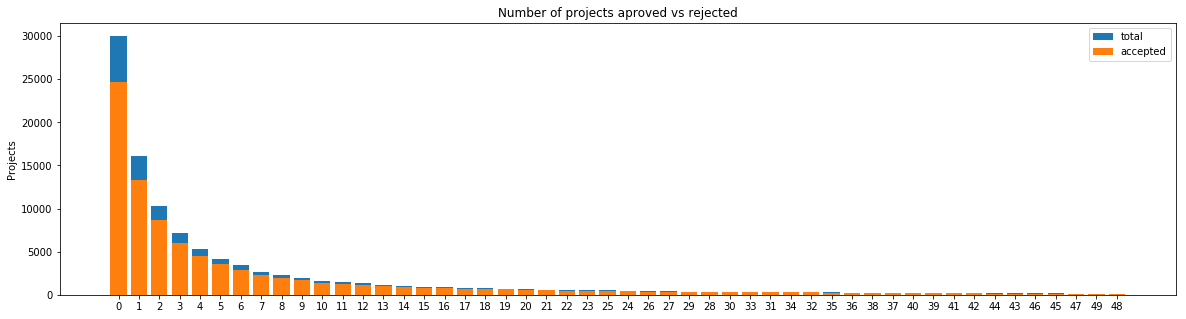

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
46                                            46                  149    164   
45                                            45                  141    153   
47                                            47                  129    144   
49                                            49                  128    143   
48                                       

In [45]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=50)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [46]:
approved_summary_wc = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_summary_wc = approved_summary_wc.values

rejected_summary_wc = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_summary_wc = rejected_summary_wc.values

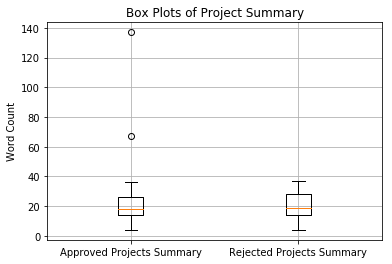

In [47]:
plt.boxplot([approved_summary_wc, rejected_summary_wc])
plt.title('Box Plots of Project Summary')
plt.xticks([1,2],('Approved Projects Summary','Rejected Projects Summary'))
plt.ylabel('Word Count')
plt.grid()
plt.show()

**Observation:** Average number of words in project summary is around 18 in both cases.

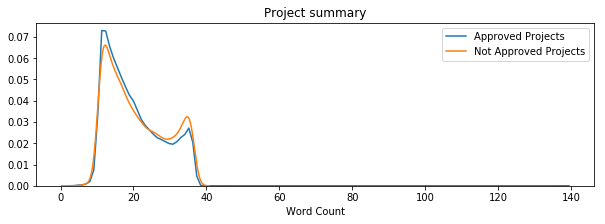

In [48]:
plt.figure(figsize=(10,3))
sns.distplot(approved_summary_wc, hist=False, label="Approved Projects")
sns.distplot(rejected_summary_wc, hist=False, label="Not Approved Projects")
plt.title('Project summary')
plt.xlabel('Word Count')
plt.legend()
plt.show()

**Observation:** If the word count in project summary is above 23, chances of getting rejected is higher than getting accepted.

In [49]:
project_data['project_resource_summary'] = project_data['project_resource_summary'].astype(str)

# https://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas
project_data['is_numeric'] = project_data['project_resource_summary'].str.contains('0|1|2|3|4|5|6|7|8|9', regex=True)

In [50]:
project_data['is_numeric'] = project_data['is_numeric'].replace({True: 1, False: 0})

In [51]:
project_data['is_numeric'].value_counts()

0    93492
1    15756
Name: is_numeric, dtype: int64

**Observation:** 15756 projects have numeric digits in their project summary

Number of projects that are approved for funding  14090 , ( 89.42625031733942 %)
Number of projects that are not approved for funding  1666 , ( 10.573749682660575 %)


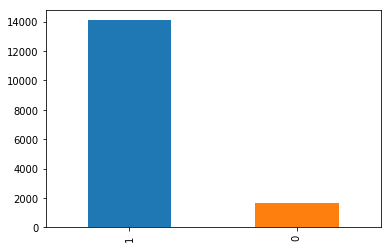

In [52]:
approved_numeric_summary = project_data[project_data['is_numeric']==1]['project_is_approved'].value_counts()
print("Number of projects that are approved for funding ", approved_numeric_summary[1], ", (", (approved_numeric_summary[1]/(approved_numeric_summary[1]+approved_numeric_summary[0]))*100,"%)")
print("Number of projects that are not approved for funding ", approved_numeric_summary[0], ", (", (approved_numeric_summary[0]/(approved_numeric_summary[1]+approved_numeric_summary[0]))*100,"%)")
approved_numeric_summary.plot.bar()
plt.show()

**Observation:** Out of 15756 projects which contained numeric digits in their project summary, 89% of them got approved. So there may or may not have an advantage of having numeric data in project summary, since only around 13% of total approved projects have numeric digits in their summary.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [53]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,is_numeric
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


In [54]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [55]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [56]:
sent = decontracted(project_data['essay'].values[0])
print(sent)
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner is have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd is and players, students are 

In [57]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school.      We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect. The limits of your language are the limits of your world. -Ludwig Wittgenstein  Our English learner is have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.    By providing these dvd is and players, students are able to co

In [58]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are English learners that are working on English as their second or third languages We are a melting pot of refugees immigrants and native born Americans bringing the gift of language to our school We have over 24 languages represented in our English Learner program with students at every level of mastery We also have over 40 countries represented with the families within our school Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures beliefs and respect The limits of your language are the limits of your world Ludwig Wittgenstein Our English learner is have a strong support system at home that begs for more resources Many times our parents are learning to read and speak English along side of their children Sometimes this creates barriers for parents to be able to help their child learn phonetics letter recognition and other reading skills By providing these dvd is and players students are able to continue their mastery of the En

In [59]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [60]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████| 109248/109248 [02:51<00:00, 636.29it/s]


In [61]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [62]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,is_numeric
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [63]:
preprocessed_titles = []
for title in tqdm(project_data['project_title'].values):
    sent = decontracted(title)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|████████████████████████████████| 109248/109248 [00:13<00:00, 8214.28it/s]


## 1. 4 Preparing data for models

In [64]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'is_numeric'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [65]:
sorted_cat_dict.keys()

dict_keys(['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language'])

In [66]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding  (109248, 9)


In [67]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding  (109248, 30)


In [68]:
list(project_data['school_state'].unique())[:10]

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA']

In [69]:
vectorizer = CountVectorizer(vocabulary=list(project_data['school_state'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of the matrix after one hot encoding ", school_state_one_hot.shape)

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of the matrix after one hot encoding  (109248, 51)


In [188]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')

In [189]:
#ValueError:- https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#Removing dot(.) from Mr., Mrs., Dr.  :- https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column

project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace(r'.', '')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
vectorizer = CountVectorizer(vocabulary=list(project_data['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype(str))
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype(str))
print("Shape of the matrix after one hot encoding ", school_state_one_hot.shape)

['mrs', 'mr', 'ms', 'teacher', 'dr']
Shape of the matrix after one hot encoding  (109248, 51)


In [183]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [184]:
vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'])
print(vectorizer.get_feature_names())

project_grade_one_hot = vectorizer.transform(project_data['project_grade_category'])
print("Shape of the matrix after one hot encoding ", school_state_one_hot.shape)

['grades_prek_2', 'grades_6_8', 'grades_3_5', 'grades_9_12']
Shape of the matrix after one hot encoding  (109248, 51)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [72]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [73]:
vectorizer = CountVectorizer(min_df=5)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding ",title_bow.shape)

Shape of matrix after one hot encoding  (109248, 5107)


#### 1.4.2.3 TFIDF vectorizer

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encoding ",text_tfidf.shape)

Shape of matrix after one hot encoding  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [75]:
vectorizer = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encoding  (109248, 5107)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [ ]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('D://glove/glove.42B.300d.txt')


words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

386it [00:00, 3859.78it/s]

Loading Glove Model


1917495it [17:36, 1814.28it/s]


Done. 1917495  words loaded!
all the words in the coupus 17014413
the unique words in the coupus 58968
The number of words that are present in both glove vectors and our coupus 51503 ( 87.341 %)
word 2 vec length 51503


In [80]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [81]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████| 109248/109248 [01:29<00:00, 1217.91it/s]

109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [82]:
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|███████████████████████████████| 109248/109248 [00:08<00:00, 13156.90it/s]

109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [83]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [84]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████| 109248/109248 [11:16<00:00, 161.60it/s]

109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [85]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [86]:
tfidf_w2v_vectors_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    tf_idf_weight=0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|████████████████████████████████| 109248/109248 [00:11<00:00, 9302.71it/s]

109248
300


### 1.4.3 Vectorizing Numerical features

In [87]:
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard Deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_normalized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard Deviation : 367.49634838483496


In [88]:
price_normalized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [89]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

num_project_scalar = StandardScaler()
num_project_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(f"Mean : {num_project_scalar.mean_[0]}, Standard Deviation : {np.sqrt(num_project_scalar.var_[0])}")


# Now standardize the data with above maen and variance.
num_project_normalized = num_project_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard Deviation : 27.77702641477403


In [90]:
num_project_normalized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [91]:
#Since avgw2v & tfidfw2v produced lists, we need to convert them to numpy array to stack up.
avg_w2v_vectors_title = np.array(avg_w2v_vectors_title)
tfidf_w2v_vectors_titles = np.array(tfidf_w2v_vectors_titles)

In [144]:
print(school_state_one_hot.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(title_bow.shape)
print(title_tfidf.shape)
print(price_normalized.shape)
print(tfidf_w2v_vectors_titles.shape)
print(avg_w2v_vectors_title.shape)
print(price_normalized.shape)
print(num_project_normalized.shape)

(109248, 51)
(109248, 9)
(109248, 30)
(109248, 6)
(109248, 5107)
(109248, 5107)
(109248, 1)
(109248, 300)
(109248, 300)
(109248, 1)
(109248, 1)


In [146]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matrix :)
X_A = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, title_bow, price_normalized, num_project_normalized))
X_A.shape

(109248, 5205)

In [147]:
X_B = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, title_tfidf, price_normalized, num_project_normalized))
X_B.shape

(109248, 5205)

In [148]:
X_C = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, avg_w2v_vectors_title, price_normalized, num_project_normalized))
X_C.shape

(109248, 398)

In [149]:
X_D = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, tfidf_w2v_vectors_titles, price_normalized, num_project_normalized))
X_D.shape

(109248, 398)

In [169]:
X_final = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, title_bow, title_tfidf, avg_w2v_vectors_title, tfidf_w2v_vectors_titles, price_normalized, num_project_normalized))
X_final.shape

(109248, 10912)

In [171]:
# coo_matrix is not subscriptable: https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
from scipy.sparse import coo_matrix
X_A = X_A.tocsr()
X_B = X_B.tocsr()
X_C = X_D.tocsr()
X_D = X_D.tocsr()
X_final = X_final.tocsr()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [151]:
label = project_data['project_is_approved'].head(5000)

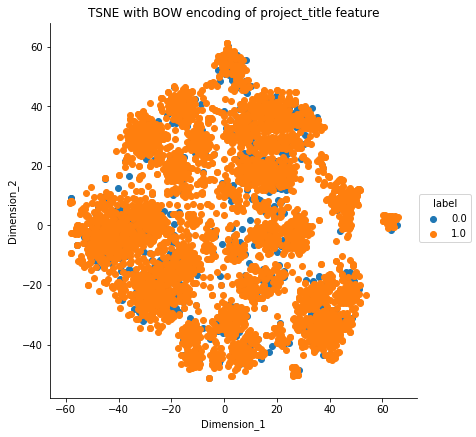

In [152]:
# sparse matrix to dense matrix: https://stackoverflow.com/questions/55637498/numpy-ndarray-sparse-matrix-to-dense

X_A = X_A[0:5000] #taking first 5k rows
X_A = X_A.toarray()

# Perplexity:30

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(X_A)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=("Dimension_1", "Dimension_2", "label"))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()

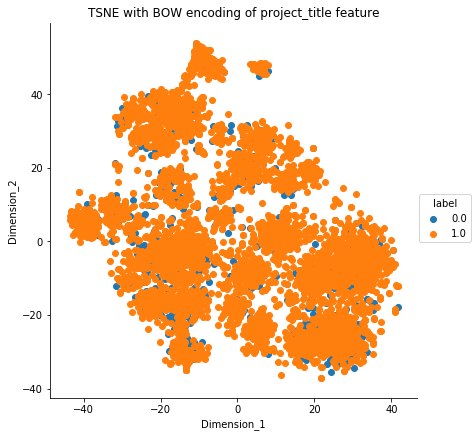

In [158]:
# Perplexity:50

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(X_A)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=("Dimension_1", "Dimension_2", "label"))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()

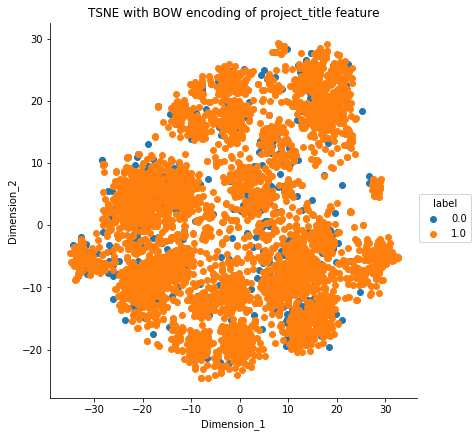

In [159]:
# Perplexity:100

model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000)
tsne_data = model.fit_transform(X_A)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=("Dimension_1", "Dimension_2", "label"))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dimension_1", "Dimension_2").add_legend()
plt.title('TSNE with BOW encoding of project_title feature')
plt.show()

**Observation:** We could see the points of both approved and not-approved projects are not very well separated and mostly clustered together. So we cannot make much out of it.

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

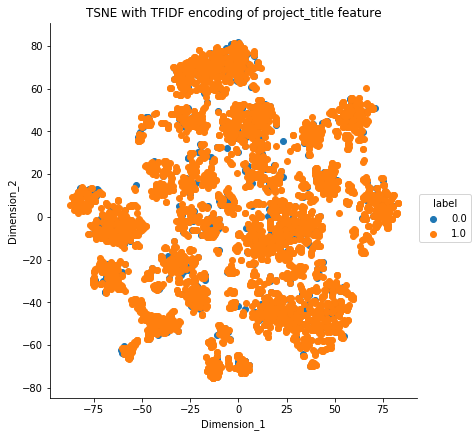

In [160]:
X_B = X_B[0:5000] #taking first 5k rows
X_B = X_B.toarray()

# Perplexity:30

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(X_B)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()

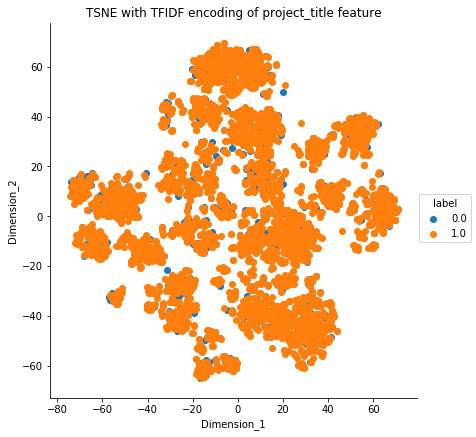

In [161]:
# Perplexity:50

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(X_B)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()

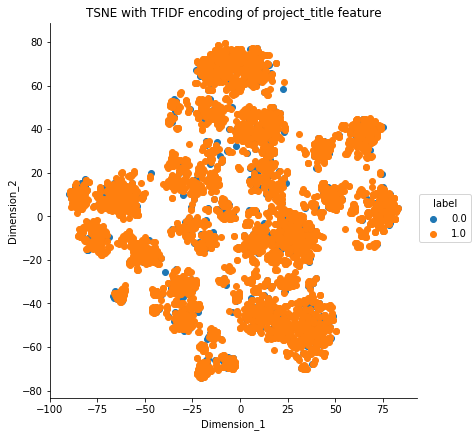

In [168]:
# Perplexity:50, no. of iterations:2000

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=2000)
tsne_data = model.fit_transform(X_B)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()

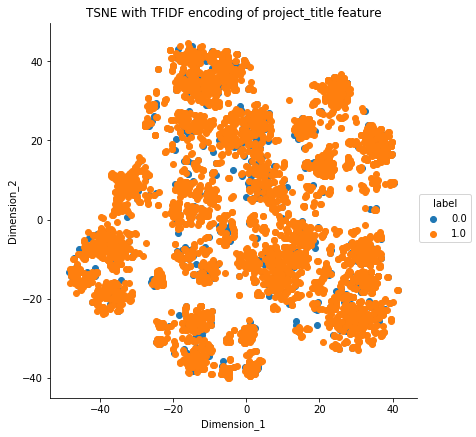

In [176]:
# Perplexity:100, no. of iterations:1000; since 1000 and 2000 iterations produced almost similar results, so keeping 1000 for faster calulations

model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000)
tsne_data = model.fit_transform(X_B)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature')
plt.show()

**Observation:** Although there is some scattering of points but they aren't well separated. So we can't make much out of it.

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

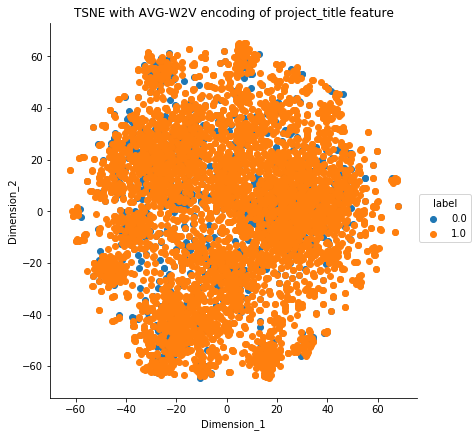

In [162]:
X_C = X_C[0:5000] #taking first 5k rows
X_C = X_C.toarray()

# Perplexity:30

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(X_C)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with AVG-W2V encoding of project_title feature')
plt.show()

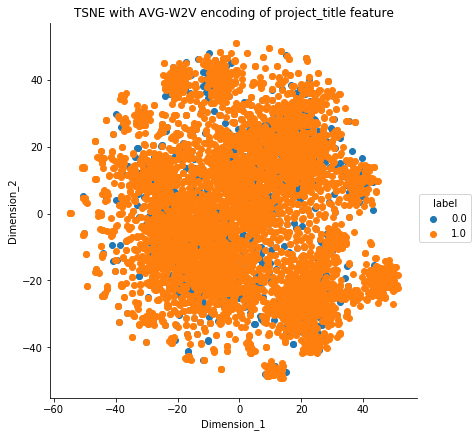

In [163]:
# Perplexity:50

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(X_C)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with AVG-W2V encoding of project_title feature')
plt.show()

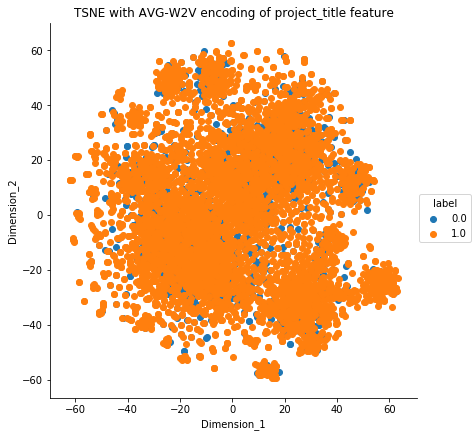

In [167]:
# Perplexity:50, no. of iterations:2000

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=2000)
tsne_data = model.fit_transform(X_C)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with AVG-W2V encoding of project_title feature')
plt.show()

**Observation:** Most of the points are clustered together. So we can't distinguish any pattern of approved vs rejected projects.

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

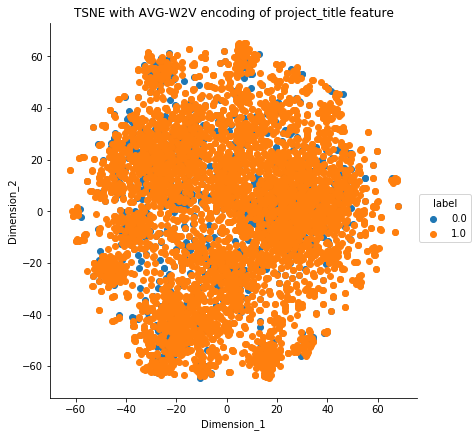

In [164]:
X_D = X_D[0:5000] #taking first 5k rows
X_D = X_D.toarray()

# Perplexity:30

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(X_D)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF-W2V encoding of project_title feature') # ---------Please ignore the title in the plot-----------#
plt.show()

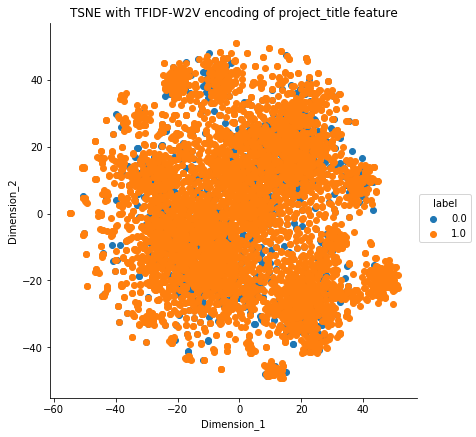

In [165]:
# Perplexity:50

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(X_D)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF-W2V encoding of project_title feature')
plt.show()

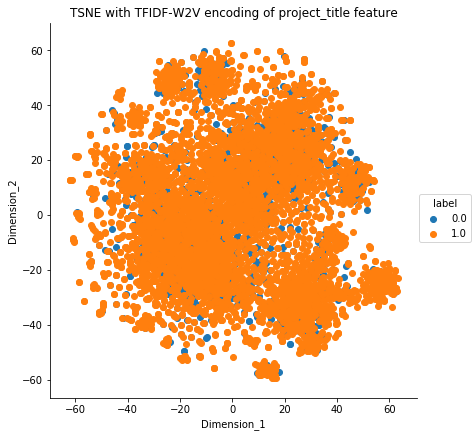

In [166]:
# Perplexity:50, no. of iterations:2000

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=2000)
tsne_data = model.fit_transform(X_D)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with TFIDF-W2V encoding of project_title feature')
plt.show()

**Observation:** Most of the points are clustered together. So we can't distinguish any pattern of approved vs rejected projects.

# 2.5 TSNE with all the features combined

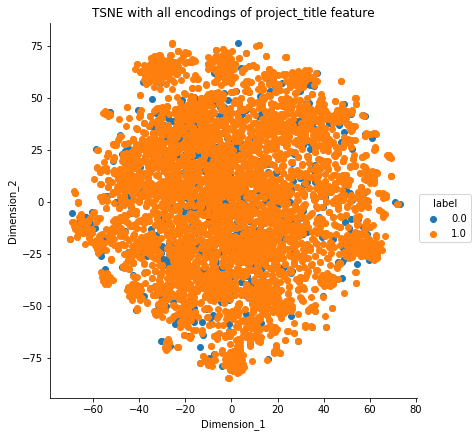

In [172]:
X_final = X_final[0:5000] #taking first 5k rows
X_final = X_final.toarray()

# Perplexity:30

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(X_final)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with all encodings of project_title feature') 
plt.show()

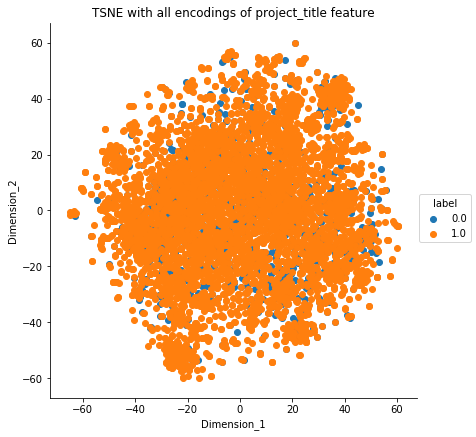

In [173]:
# Perplexity:50

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(X_final)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with all encodings of project_title feature') 
plt.show()

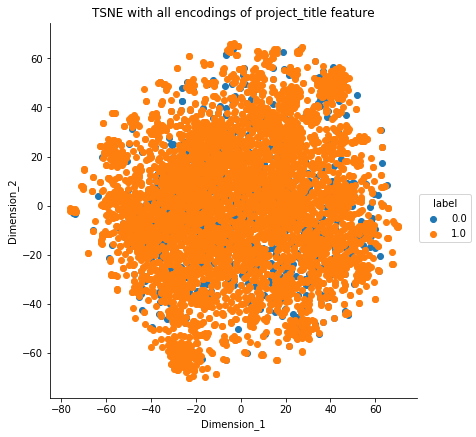

In [174]:
# Perplexity:50, no. of iterations: 2000

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=2000)
tsne_data = model.fit_transform(X_final)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with all encodings of project_title feature') 
plt.show()

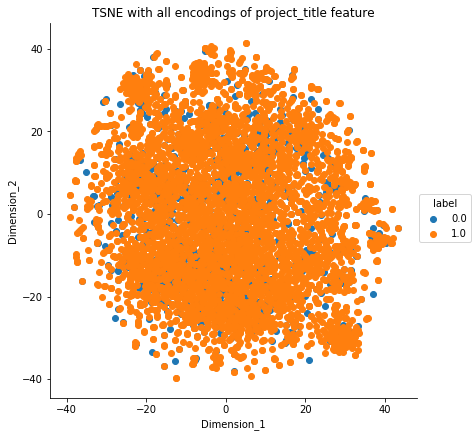

In [175]:
# Perplexity: 100

model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000)
tsne_data = model.fit_transform(X_final)

tsne_data_new = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data_new, columns=('Dimension_1', 'Dimension_2', 'label'))

# Plotting the tsne 
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.title('TSNE with all encodings of project_title feature') 
plt.show()

**Observation:** With multiple values of perplexity and n_iterations, we can't figure out much from the plot as the points are mostly clustered together.

<h2> 2.5 Conclusions </h2>

1. We tried to visualize the data using TSNE, so that we can segregate approved projects vs rejected projects.<br /><br />

2. We have done analysis for 5k points using some of the features. <br /><br />

3. From univariate analysis of features, we found out values of some features like cost of project, number of previously posted  projects, project title, teacher_prefix, project_grade, project essay have some effect in getting a projected approved/rejected. <br /><br />

4. Mostly the points are either clustered together or overlapped, so we weren't able to find any major distinguishable pattern between the approved and the rejected projects.
